# Поведения пользователей в приложении "Ненужные вещи"

## Введение:

Мобильное приложение "Ненужные вещи" — это платформа, где пользователи могут размещать объявления о продаже своих товаров. Анализ поведения пользователей приложения играет ключевую роль для повышения его эффективности и улучшения пользовательского опыта.

В проекте представлены данные о действиях пользователей, впервые совершивших активности после 7 октября 2019 года, и данные об источниках установки приложения. Эти данные позволяют понять, как пользователи взаимодействуют с приложением, какие действия они совершают чаще, и как можно улучшить их взаимодействие.

Основное внимание будет уделено анализу удержания пользователей, времени, проведенного в приложении, частоте действий и конверсии в просмотры контактов, а также проверке гипотез о различиях между группами пользователей.

## Цель работы:

Выделить группы пользователей, которые отличаются по поведению, и провести анализ их активности для выявления факторов, влияющих на удержание, вовлеченность и конверсию. На основе полученных данных будут сформированы рекомендации по улучшению пользовательского опыта и увеличению ключевых показателей приложения.




## Проработка данных:

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
import math  

In [2]:
#загрузка данных
try:
    source = pd.read_csv('/datasets/mobile_sources.csv')
    df = pd.read_csv('/datasets/mobile_dataset.csv')
except:
    source = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')
    df = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [3]:
# Общая информация о данных
print('Sources dataset info:')
source.info()
print('\n Dataset info:')
df.info()

Sources dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB

 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [4]:
# Проверка на пропуски и дубликаты
print('\nПропуски в sources:')
print(source.isnull().sum())


Пропуски в sources:
userId    0
source    0
dtype: int64


In [5]:
print('\nПропуски в dataset:')
print(df.isnull().sum())


Пропуски в dataset:
event.time    0
event.name    0
user.id       0
dtype: int64


In [6]:
print('\nДубликаты в sources:', source.duplicated().sum())
print('Дубликаты в dataset:', df.duplicated().sum())


Дубликаты в sources: 0
Дубликаты в dataset: 0


In [7]:
print('\nПример данных sources:')
display(source.head()) 


Пример данных sources:


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [8]:
source.rename(columns={'userId': 'user.id'}, inplace=True)

In [9]:
print('\nПример данных sources:')
display(df.head()) 


Пример данных sources:


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [10]:
# Проверим значения event.time на корректность
try:
    df['event.time'] = pd.to_datetime(df['event.time'])
    print('Временные данные корректны.')
except Exception as e:
    print(f'Ошибка в данных времени: {e}')

Временные данные корректны.


In [11]:
# Проверка уникальности идентификаторов пользователей между датасетами
missing_in_sources = set(df['user.id']) - set(source['user.id'])
missing_in_dataset = set(source['user.id']) - set(df['user.id'])

print(f'Пользователи из dataset, отсутствующие в sources: {len(missing_in_sources)}')
print(f'Пользователи из sources, отсутствующие в dataset: {len(missing_in_dataset)}')

Пользователи из dataset, отсутствующие в sources: 0
Пользователи из sources, отсутствующие в dataset: 0


In [12]:
display(source)

,user.id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


In [13]:
display(df)

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [14]:
#Приведения категорий к единому формату
event_name_mapping = {
    'contacts_show': 'contacts',
    'show_contacts': 'contacts',
}

# Приведение event.name к единому формату
df['event.name'] = df['event.name'].replace(event_name_mapping)

# Проверяем уникальные значения после замены
print(df['event.name'].unique())

['advert_open' 'tips_show' 'map' 'contacts' 'search_4' 'search_5'
 'tips_click' 'photos_show' 'search_1' 'search_2' 'search_3'
 'favorites_add' 'contacts_call' 'search_6' 'search_7']


### Промежуточные выводы:

1. Пропуски:

* В обоих наборах данных нет пропущенных значений.

2. Дубликаты:

* В обоих наборах данных отсутствуют дубликаты строк (duplicated().sum() показывает ноль).

3. Временные данные:

* Поле event.time в наборе данных было успешно преобразовано в формат datetime, что подтверждает корректность временных данных.

4. Консистентность идентификаторов пользователей:

* Идентификаторы пользователей в обоих наборах данных полностью совпадают, нет отсутствующих идентификаторов пользователей в одном из наборов.

## Поставленные задачи:

<b>3.1. Исследовательский анализ данных</b>

<u>3.1.1. Retention Rate:</u>

* Рассчитать долю пользователей, возвращающихся в приложение на 1-й, 7-й и 14-й дни.
* Построить графики удержания (когортный анализ).

<u>3.1.2. Время, проведенное в приложении:</u>
* Рассчитать среднее и медианное время использования.
* Изучить распределение времени по группам пользователей.

<u>3.1.3. Частота действий:</u>
* Оценить, сколько действий в среднем совершает пользователь.
* Выделить самые популярные и редкие действия.

<u>3.1.4. Конверсия в целевое действие:</u>
* Рассчитать долю пользователей, просмотревших контакты, среди всех пользователей.
* Сравнить конверсии по источникам установки приложения.

<b>3.2. Сегментация пользователей</b>

<u>3.2.1. Провести кластерный анализ, чтобы выделить группы пользователей на основе:</u>
* Времени, проведенного в приложении.
* Частоты выполнения действий.
* Конверсии в целевое действие.
* Проанализировать ключевые особенности каждого сегмента.

<b>3.3. Проверка статистических гипотез</b>
* Гипотеза 1:
Нулевая гипотеза (H₀): Конверсии в просмотры контактов для пользователей из yandex и google одинаковы.
Альтернативная гипотеза (H₁): Конверсии в просмотры контактов для пользователей из yandex и google различны.
Тест: Z-тест для пропорций.
* Гипотеза 2:
Нулевая гипотеза (H₀): Пользователи, кликающие на рекомендации, открывают карту объявлений с такой же частотой, как и остальные пользователи.
Альтернативная гипотеза (H₁): Пользователи, кликающие на рекомендации, чаще открывают карту объявлений.
Тест: T-тест для независимых выборок или Mann-Whitney U тест.

<b>3.4. Формирование выводов</b>
* Сформулировать ключевые выводы по каждому из этапов.
Подготовить рекомендации для команды разработки или маркетинга, которые помогут улучшить пользовательский опыт и увеличить ключевые метрики.

## Исследовательский анализ данных

### Retention Rate:

* Рассчитаем долю пользователей, возвращающихся в приложение на 1-й, 7-й и 14-й дни.
* Построим графики удержания.

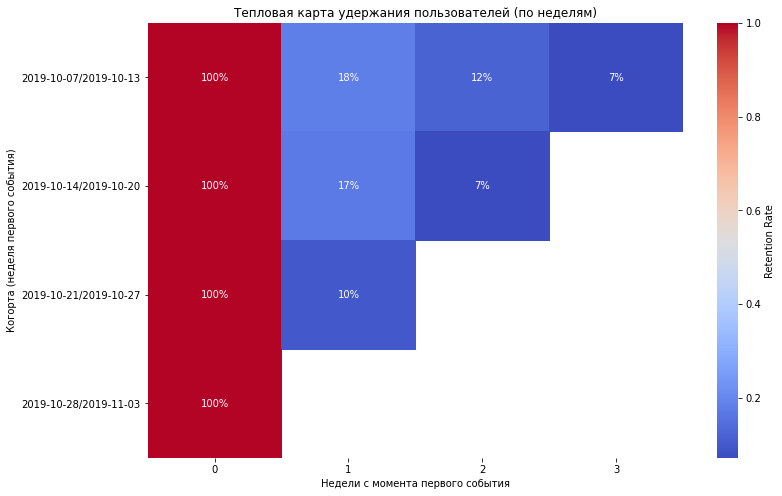

In [15]:
# 1. Получаем дату первого события для каждого пользователя, округляя до секунд
df['first_event'] = df.groupby('user.id')['event.time'].transform(lambda x: x.min().floor('s'))

# 2. Создаем когорту пользователей (дата первого события)
df['cohort'] = df['first_event'].dt.to_period('W')  # Когорта по неделям

# 3. Вычисляем разницу в неделях между текущим событием и первым событием
df['weeks_diff'] = ((df['event.time'] - df['first_event']).dt.days // 7)

# 4. Подсчитываем уникальных пользователей в каждой когорте и неделе
cohort_data = (
    df.groupby(['cohort', 'weeks_diff'])['user.id']
    .nunique()
    .reset_index()
    .rename(columns={'user.id': 'users'})
)

# 5. Определяем размер когорты (количество пользователей на 0-й неделе)
cohort_sizes = (
    cohort_data[cohort_data['weeks_diff'] == 0][['cohort', 'users']]
    .rename(columns={'users': 'cohort_size'})
)

# 6. Присоединяем размер когорты к основным данным
cohort_data = cohort_data.merge(cohort_sizes, on='cohort')

# 7. Рассчитываем коэффициент удержания
cohort_data['retention_rate'] = cohort_data['users'] / cohort_data['cohort_size']

# 8. Преобразуем данные в формат матрицы для тепловой карты
retention_matrix = cohort_data.pivot(index='cohort', columns='weeks_diff', values='retention_rate')

# 9. Визуализируем тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt=".0%", cmap="coolwarm", cbar_kws={'label': 'Retention Rate'})
plt.title('Тепловая карта удержания пользователей (по неделям)')
plt.xlabel('Недели с момента первого события')
plt.ylabel('Когорта (неделя первого события)')
plt.show()


#### Промежуточный вывод:

1. Когорта 2019-10-07/2019-10-13: Начальное удержание (week 0) составляет 1.0, что означает полное удержание на первой неделе. С каждым последующим week (1, 2, 3) коэффициент удержания уменьшается, но все еще остается значительным (на week 3 — 0.071681).

2. Когорта 2019-10-14/2019-10-20: Удержание на первой неделе составляет 1.0 (полное удержание). Затем удержание постепенно снижается: на второй неделе — 0.172384, а на третьей неделе — 0.074614. Однако на четвертой неделе данных нет (NaN).

3. Когорта 2019-10-21/2019-10-27: Удержание на первой неделе также составляет 1.0. Однако на второй неделе удержание значительно снижается до 0.100548, и на последующих неделях данных нет (NaN).

4. Когорта 2019-10-28/2019-11-03: На первой неделе удержание снова 1.0, но на остальных неделях нет данных (NaN).

Везде, где значение 1.0, это полное удержание на соответствующей неделе.
Для большинства когорт удержание падает по мере увеличения недель. Однако для некоторых когорт на более поздних неделях данные отсутствуют.
В общем, данные показывают уменьшение удержания со временем, что является типичным для многих процессов, где интересует удержание пользователей или клиентов.

### Время, проведенное в приложении:
* Рассчитаем среднее и медианное время использования.
* Изучим распределение времени по группам пользователей.

In [16]:
# Задаем тайм-аут для сессии (в секундах, например, 30 минут)
session_timeout = 30 * 60  

# Сортируем данные по пользователю и времени
df = df.sort_values(by=['user.id', 'event.time'])

# Вычисляем разницу во времени между событиями
df['time_diff'] = df.groupby('user.id')['event.time'].diff().dt.total_seconds()

# Преобразуем разницу времени в минуты для анализа
df['time_diff_minutes'] = df['time_diff'] / 60

# Очистка данных от пропусков в time_diff
time_diff_minutes_cleaned = df['time_diff_minutes'].dropna()

# Сортировка значений для построения кумулятивного распределения
time_diff_values = np.sort(time_diff_minutes_cleaned)
cumulative_distribution = np.arange(1, len(time_diff_values) + 1) / len(time_diff_values)

# Продолжение работы с сессиями
df['new_session'] = (df['time_diff'] > session_timeout) | (df['time_diff'].isna())
df['session_id'] = df.groupby('user.id')['new_session'].cumsum()

# Вычисляем начало и конец каждой сессии
session_time = df.groupby(['user.id', 'session_id'])['event.time'].agg(['min', 'max'])

# Рассчитываем продолжительность сессий
session_time['session_duration'] = (session_time['max'] - session_time['min']).dt.total_seconds()

# Среднее и медианное время сессии
mean_session_time = session_time['session_duration'].mean()
median_session_time = session_time['session_duration'].median()

# Выводим результаты
print(f"Среднее время сессии: {mean_session_time:.2f} секунд")
print(f"Медианное время сессии: {median_session_time:.2f} секунд")

Среднее время сессии: 772.67 секунд
Медианное время сессии: 335.17 секунд


In [17]:
session_time

min  \
user.id                              session_id                              
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 1          2019-10-07 13:39:45.989359   
                                     2          2019-10-09 18:33:55.577963   
                                     3          2019-10-21 19:52:30.778932   
                                     4          2019-10-22 11:18:14.635436   
00157779-810c-4498-9e05-a1e9e3cedf93 1          2019-10-19 21:34:33.849769   
...                                                                    ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 26         2019-11-02 01:16:48.947231   
                                     27         2019-11-02 18:01:27.094834   
                                     28         2019-11-02 19:25:53.794029   
                                     29         2019-11-03 14:32:55.956301   
                                     30         2019-11-03 15:36:01.007440   

                                                                       max  \
user.id                              session_id                              
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 1          2019-10-07 13:49:41.716617   
                                     2          2019-10-09 18:42:22.963948   
                                     3          2019-10-21 20:07:30.051028   
                                     4          2019-10-22 11:30:52.807203   
00157779-810c-4498-9e05-a1e9e3cedf93 1          2019-10-19 21:59:54.637098   
...                                                                    ...   
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 26         2019-11-02 01:16:48.947231   
                                     27         2019-11-02 18:17:41.386651   
                                     28         2019-11-02 19:30:50.471310   
                                     29         2019-11-03 14:48:44.263356   
                                     30         2019-11-03 16:08:25.388712   

                                                 session_duration  
user.id                              session_id                    
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 1                 595.727258  
                                     2                 507.385985  
                                     3                 899.272096  
                                     4                 758.171767  
00157779-810c-4498-9e05-a1e9e3cedf93 1                1520.787329  
...                                                           ...  
fffb9e79-b927-4dbb-9b48-7fd09b23a62b 26                  0.000000  
                                     27                974.291817  
                                     28                296.677281  
                                     29                948.307055  
                                     30               1944.381272  

[10368 rows x 3 columns]

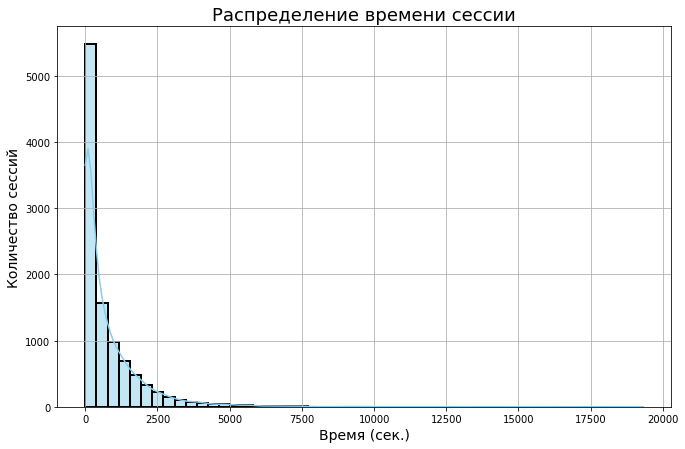

In [18]:
plt.figure(figsize=(11, 7))
sns.histplot(session_time['session_duration'], kde=True, color='skyblue', bins=50, linewidth=2)
plt.title('Распределение времени сессии', fontsize=18)
plt.xlabel('Время (сек.)', fontsize=14)
plt.ylabel('Количество сессий', fontsize=14)
plt.grid(True)
plt.show()

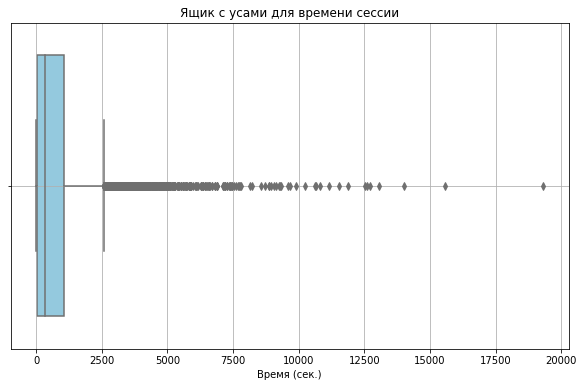

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=session_time['session_duration'], color='skyblue')
plt.title('Ящик с усами для времени сессии')
plt.xlabel('Время (сек.)')
plt.grid(True)
plt.show()

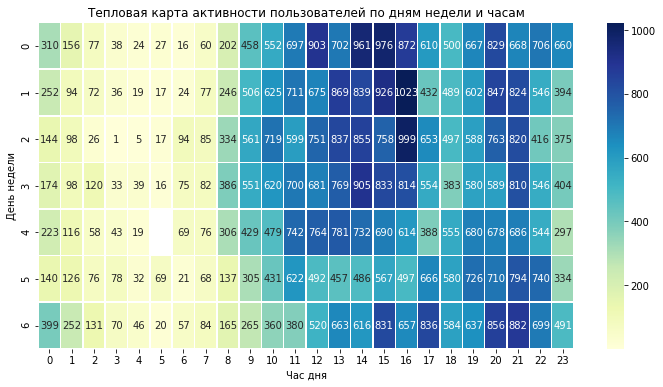

In [20]:
df['weekday'] = df['event.time'].dt.weekday  # Понедельник = 0, Воскресенье = 6
df['hour'] = df['event.time'].dt.hour

# Группируем по дням недели и часам
user_activity = df.groupby(['weekday', 'hour'])['user.id'].count().unstack()

# Строим тепловую карту
plt.figure(figsize=(12, 6))
sns.heatmap(user_activity, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)  # Форматируем в целые числа
plt.title('Тепловая карта активности пользователей по дням недели и часам')
plt.xlabel('Час дня')
plt.ylabel('День недели')
plt.show()

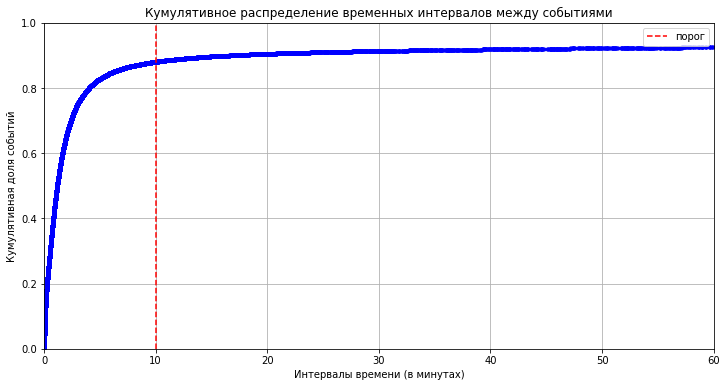

In [21]:
# кумулятивное распределение
plt.figure(figsize=(12, 6))
plt.plot(time_diff_values, cumulative_distribution, marker='.', linestyle='none', color='blue')
plt.title('Кумулятивное распределение временных интервалов между событиями')
plt.xlabel('Интервалы времени (в минутах)')
plt.ylabel('Кумулятивная доля событий')
plt.axvline(x=10, color='red', linestyle='--', label='порог')
plt.xlim(0, 60)  # ограничиваем ось X до 60 минут
plt.ylim(0, 1)  # кумулятивная доля от 0 до 1
plt.legend()
plt.grid(True)
plt.show()

#### Промежуточный вывод:
1. Среднее и медианное время сессии:

* Среднее время сессии составляет 772.67 секунд (около 12 минут 53 секунд).
* Медианное время сессии — 335.17 секунд (около 5 минут 35 секунд).
* Разница между средним и медианным значением указывает на наличие выбросов в данных, то есть небольшое количество сессий с аномально большим временем влияет на среднее значение.

2. Распределение времени сессий:

* Анализ гистограммы и кривой плотности (KDE) показал, что большинство сессий укладываются в диапазон от 0 до 600 секунд (10 минут).
* Длинный "хвост" в распределении указывает на наличие пользователей с очень длинными сессиями.

3. Активность пользователей по дням недели и времени суток:

* Наиболее активные дни недели: понедельник, вторник и суббота (в зависимости от времени суток активность может немного различаться).

4. Часы наибольшей активности: утренние часы (8:00–10:00) и вечерние часы (18:00–22:00).
* Активность плавно снижается в ночное время, минимальная активность наблюдается с 2:00 до 6:00.

5. На кумулятивном графике распределения (CDF) видно, как процент событий увеличивается с увеличением временного интервала. Этот график наглядно демонстрирует долю событий, которая приходится на каждый временной интервал. **Быстрый рост кумулятивной доли** наблюдается в первые 10 минут (красная пунктирная линия), что указывает на то, что основная часть событий происходит именно в этот период. После 10 минут кривая становится менее крутой, это говорит нам об увеличении временных интервалов между событиями, которые начинают происходить все реже. На основе этого графика можно сделать вывод, что установка 10-минутного порога для тайм-аута сессий является оправданной, так как большинство событий фиксируется в пределах этого временного отрезка.

6. Выделение сессий:

* Сессии выделены с учетом активности в пределах одного дня или с применением тайм-аута. Это позволило скорректировать расчет метрик для более точного анализа.

### Частота действий:

* Оценим, сколько действий в среднем совершает пользователь.
* Выделим самые популярные и редкие действия.

In [22]:
# Подсчитываем количество событий на пользователя
user_actions = df.groupby('user.id')['event.name'].count()

# Среднее количество действий
avg_actions = user_actions.mean()

# Определим самые популярные и редкие действия
action_counts = df['event.name'].value_counts()
most_popular_action = action_counts.idxmax()
least_popular_action = action_counts.idxmin()

avg_actions, most_popular_action, least_popular_action
(17.283251805264385, 'tips_show', 'show_contacts')

(17.283251805264385, 'tips_show', 'show_contacts')

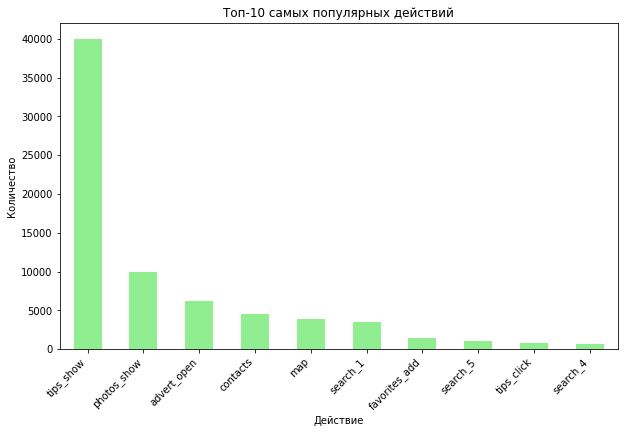

In [23]:
plt.figure(figsize=(10, 6))
action_counts.head(10).plot(kind='bar', color='lightgreen')
plt.title('Топ-10 самых популярных действий')
plt.xlabel('Действие')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Промежуточные выводы:
* Среднее количество действий: в среднем пользователь совершает около 17.28 действий в приложении.

* Самое популярное действие: действие с наибольшим количеством — это tips_show, что может означать, что пользователи часто просматривают советы или подсказки в приложении.

* Самое редкое действие: самое редкое действие — это show_contacts, что свидетельствует о том, что пользователи редко просматривают контакты.

### Конверсия в целевое действие:

* Рассчитаем долю пользователей, просмотревших контакты, среди всех пользователей.
* Сравним конверсии по источникам установки приложения.

source
google    24.357839
other     18.536585
yandex    24.715615
Name: user.id, dtype: float64


/tmp/ipykernel_48/3108623281.py:41: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(


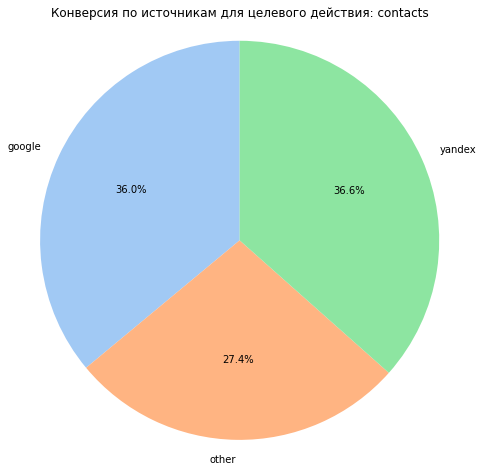

Этапы пути:
event.name
tips_show        2801
map              1456
photos_show      1095
contacts          981
search_1          787
advert_open       751
search_5          663
search_4          474
favorites_add     351
search_6          330
tips_click        322
search_2          242
contacts_call     213
search_3          208
search_7          157
Name: user.id, dtype: int64


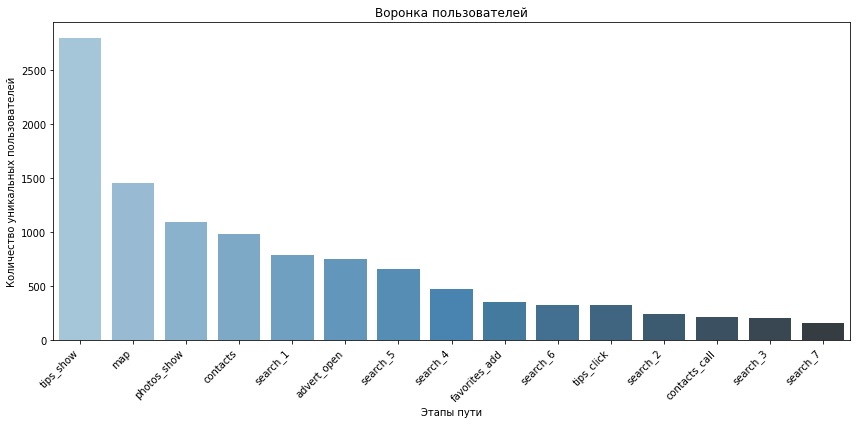

In [24]:
# Определяем целевое действие
target_action = 'contacts'

# Объединяем DataFrame с источниками с основным DataFrame
df_with_source = df.merge(source, on='user.id', how='left')

# Проверяем на наличие пропусков и обрабатываем их
df_with_source.fillna({'source': 'unknown'}, inplace=True)

# Проверяем, есть ли целевое действие в данных
if target_action not in df_with_source['event.name'].unique():
    raise ValueError(f"Целевое действие '{target_action}' отсутствует в данных!")

# Выбираем пользователей, совершивших целевое действие
target_action_users = df_with_source[df_with_source['event.name'] == target_action]

# Проверяем, есть ли пользователи, совершившие целевое действие
if target_action_users.empty:
    raise ValueError("Нет пользователей, совершивших целевое действие!")

# Рассчитываем конверсию по источникам
source_users = df_with_source.groupby('source')['user.id'].nunique()
target_users = target_action_users.groupby('source')['user.id'].nunique()

# Избегаем деления на ноль
source_users = source_users.replace(0, 1)

# Вычисляем конверсию
source_conversion = (target_users / source_users).fillna(0)

# Выводим результат в процентах
source_conversion_percent = source_conversion * 100
print(source_conversion_percent)

# Нормализация данных для круговой диаграммы
normalized_conversion_percent = source_conversion_percent / source_conversion_percent.sum()

# Визуализируем конверсию в круговой диаграмме
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(normalized_conversion_percent)]
plt.pie(
    normalized_conversion_percent,
    labels=source_conversion_percent.index,
    autopct='%1.1f%%',  # Показываем проценты
    startangle=90,       # Начинаем с 90 градусов
    colors=colors        # Используем пастельные цвета
)
plt.title(f'Конверсия по источникам для целевого действия: {target_action}')
plt.axis('equal')  # Сделать диаграмму круговой
plt.show()

# Рассчитываем этапы пути (воронка)
funnel = df_with_source.groupby('event.name')['user.id'].nunique().sort_values(ascending=False)
print(f"Этапы пути:\n{funnel}")

# Визуализируем воронку с Seaborn
if not funnel.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=funnel.index, y=funnel.values, palette='Blues_d')
    plt.title('Воронка пользователей')
    plt.xlabel('Этапы пути')
    plt.ylabel('Количество уникальных пользователей')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Воронка пользователей пуста.")

#### Промежуточный вывод:

Конверсия по источникам:

- Google: 24.36%
- Other: 18.54%
- Yandex: 24.72%

Этапы пути:

- Tips_show: 2801 пользователей
- Map: 1456 пользователей
- Photos_show: 1095 пользователей
- Contacts: 981 пользователей
- Search_1: 787 пользователей
- Advert_open: 751 пользователей
- Search_5: 663 пользователей
- Search_4: 474 пользователей
- Favorites_add: 351 пользователей
- Search_6: 330 пользователей
- Tips_click: 322 пользователей
- Search_2: 242 пользователей
- Contacts_call: 213 пользователей
- Search_3: 208 пользователей
- Search_7: 157 пользователей

Большинство пользователей начинают с этапа "Tips_show", затем перемещаются к следующим шагам, но на каждом этапе происходит потеря пользователей. На этапе "Contacts" остаётся 981 пользователь, что отражает естественное снижение по мере прохождения пути. Несмотря на это, этап "Contacts" сохраняет значительное количество пользователей.

## Сегментация пользователей
* Времени, проведенного в приложении.
* Частоты выполнения действий.
* Конверсии в целевое действие.
* Проанализировать ключевые особенности каждого сегмента.

Рассчитывает метрики пользователей: частота действий и продолжительность сессий.

In [25]:
def calculate_user_metrics(df):
    user_metrics = df.groupby('user.id').agg(
        session_duration=('time_diff', 'sum'),  # Общая продолжительность сессий
        action_count=('event.name', 'count')    # Количество действий
    ).reset_index()
    return user_metrics

Делим пользователей на группы по поведению (квантильное разбиение).

In [26]:
def segment_users(user_metrics):
    user_metrics['session_group'] = pd.qcut(user_metrics['session_duration'], q=3, labels=['Короткие сессии', 'Средние сессии', 'Длинные сессии'])
    user_metrics['action_group'] = pd.qcut(user_metrics['action_count'], q=3, labels=['Низкая активность', 'Средняя активность', 'Высокая активность'])
    return user_metrics

Рассчитываем удержание, вовлеченность и конверсию по группам.

In [27]:
def calculate_group_metrics(df_with_groups, target_action):
    # Конверсия
    conversion = df_with_groups[df_with_groups['event.name'] == target_action].groupby(['action_group', 'session_group'])['user.id'].nunique()
    total_users = df_with_groups.groupby(['action_group', 'session_group'])['user.id'].nunique()
    conversion_rate = (conversion / total_users).fillna(0)

    # вовлеченность- средняя частота действий и продолжительность сессий
    engagement_metrics = df_with_groups.groupby(['action_group', 'session_group']).agg(
        avg_actions=('event.name', 'count'),
        avg_session_duration=('time_diff', 'mean'))
    return conversion_rate, engagement_metrics

In [28]:
def visualize_metrics(conversion_rate, engagement_metrics):
    # Конверсия
    conversion_rate.unstack().plot(kind='bar', figsize=(12, 6), colormap='Greens')
    plt.title('Конверсия по группам')
    plt.xlabel('Группа активности')
    plt.ylabel('Конверсия (%)')
    plt.legend(title='Группа сессий')
    plt.tight_layout()
    plt.show()

    # Вовлеченность
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.barplot(x=engagement_metrics.index.get_level_values('action_group'),
                y=engagement_metrics['avg_actions'], ax=axes[0], palette='Blues_d')
    axes[0].set_title('Средняя частота действий')
    axes[0].set_xlabel('Группа активности')
    axes[0].set_ylabel('Частота действий')
    sns.barplot(x=engagement_metrics.index.get_level_values('session_group'),
                y=engagement_metrics['avg_session_duration'], ax=axes[1], palette='Oranges_d')
    axes[1].set_title('Средняя продолжительность сессии')
    axes[1].set_xlabel('Группа сессий')
    axes[1].set_ylabel('Среднее время (сек)')
    plt.tight_layout()
    plt.show()
    

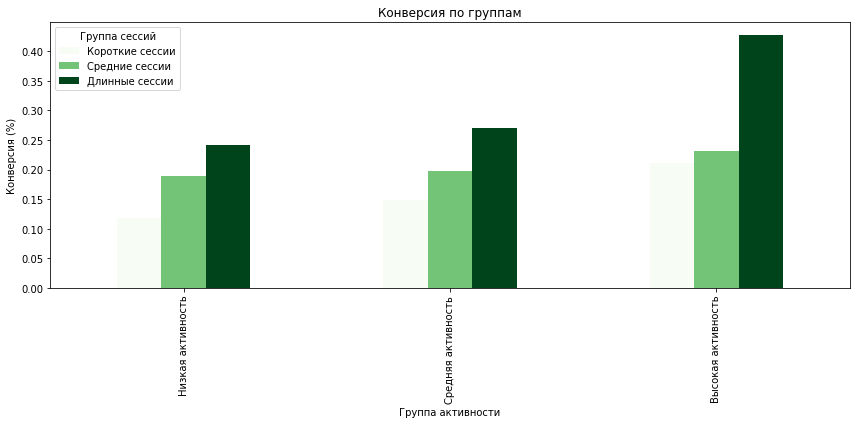

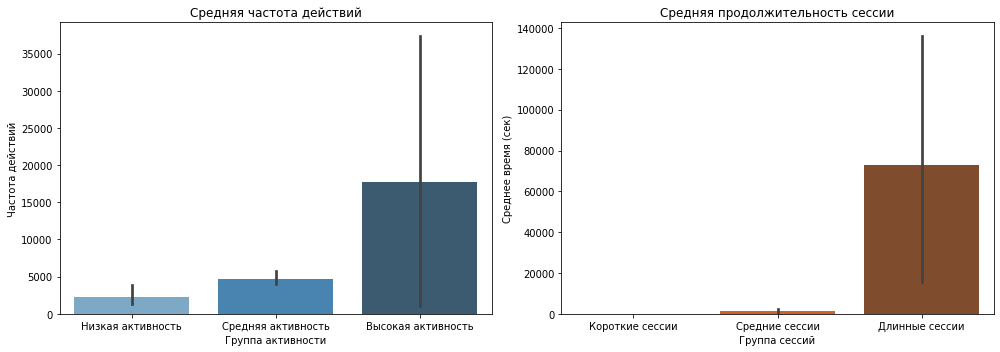

In [29]:
def main_analysis(df_with_source, target_action='contacts'):
    # Шаг 1: Расчет метрик пользователей
    user_metrics = calculate_user_metrics(df_with_source)

    # Шаг 2: Сегментация пользователей
    user_metrics = segment_users(user_metrics)

    # Шаг 3: Присоединение сегментов к основным данным
    df_with_groups = df_with_source.merge(user_metrics[['user.id', 'session_group', 'action_group']],
                                          on='user.id')

    # Шаг 4: Анализ метрик по группам
    conversion_rate, engagement_metrics = calculate_group_metrics(df_with_groups, target_action)

    # Шаг 5: Визуализация результатов
    visualize_metrics(conversion_rate, engagement_metrics)
# Запуск анализа
main_analysis(df_with_source)


In [30]:
# 1. расчет метрик пользователей
def calculate_user_metrics(df):
    user_metrics = df.groupby('user.id').agg(
        session_duration=('time_diff', 'sum'),  # Общая продолжительность сессий
        action_count=('event.name', 'count')    # Количество действий
    ).reset_index()
    return user_metrics

In [31]:
# 2. Сегментация пользователей
def segment_users(user_metrics):
    user_metrics['session_group'] = pd.qcut(
        user_metrics['session_duration'], q=3, labels=['Короткие сессии', 'Средние сессии', 'Длинные сессии'])
    user_metrics['action_group'] = pd.qcut(
        user_metrics['action_count'], q=3, labels=['Низкая активность', 'Средняя активность', 'Высокая активность'])
    return user_metrics

In [32]:
# 3. Расчет конверсии в ЦД
def calculate_conversion(df_with_groups, target_action):
    target_action_users = df_with_groups[df_with_groups['event.name'] == target_action]
    converted_users = target_action_users.groupby(['action_group', 'session_group'])['user.id'].nunique()
    total_users = df_with_groups.groupby(['action_group', 'session_group'])['user.id'].nunique()
    conversion_rate = (converted_users / total_users).fillna(0) * 100  # Конверсия в процентах
    conversion_df = conversion_rate.reset_index().rename(columns={'user.id': 'conversion_rate'})
    conversion_df['conversion_rate'] = conversion_df['conversion_rate'].round(2)
    return conversion_df

In [33]:
# 4. тепловая карта активности пользователей
def visualize_heatmap(df_with_groups):
    activity_heatmap = df_with_groups.pivot_table(
        index='action_group',
        columns='session_group',
        values='user.id',
        aggfunc='nunique',
        fill_value=0
    )
    plt.figure(figsize=(10, 6))
    sns.heatmap(activity_heatmap, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('Тепловая карта активности пользователей')
    plt.xlabel('Группа сессий')
    plt.ylabel('Группа активности')
    plt.show()

In [34]:
# 5. конверсия в ЦД
def visualize_conversion(conversion_df):
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=conversion_df,
        x='action_group',
        y='conversion_rate',
        hue='session_group',
        palette='coolwarm'
    )
    plt.title('Конверсия в ЦД по группам пользователей', fontsize=16)
    plt.xlabel('Группа активности', fontsize=14)
    plt.ylabel('Конверсия (%)', fontsize=14)
    plt.legend(title='Группа сессий', fontsize=12)
    plt.tight_layout()
    plt.show()

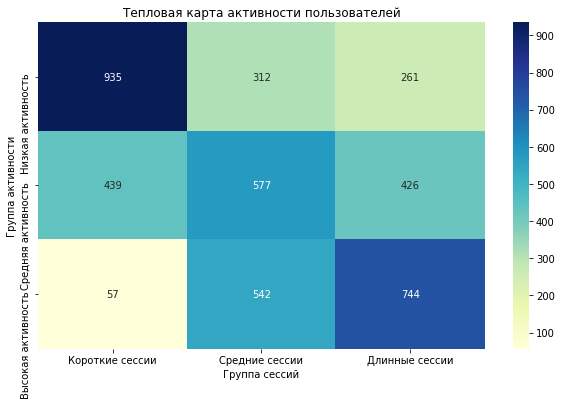

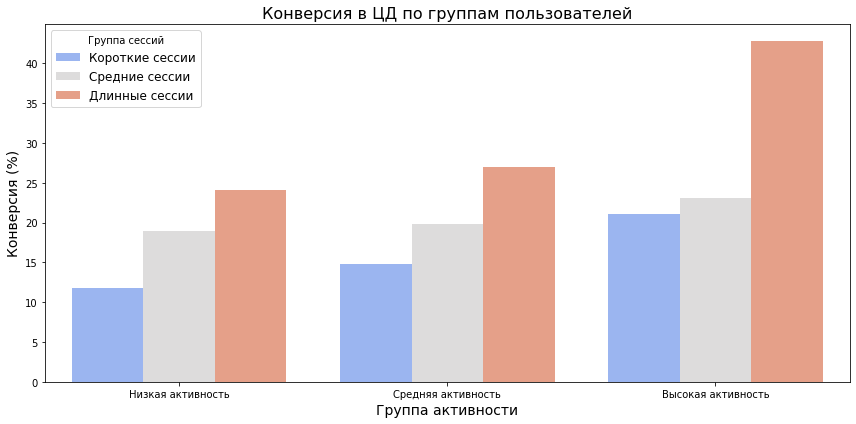

In [35]:
def main_analysis(df_with_source, target_action='contacts'):
    # расчет метрик пользователей
    user_metrics = calculate_user_metrics(df_with_source)
    
    # сегментация пользователей
    user_metrics = segment_users(user_metrics)

    # присоединение сегментов к основным данным
    df_with_groups = df_with_source.merge(
        user_metrics[['user.id', 'session_group', 'action_group']],
        on='user.id')
    visualize_heatmap(df_with_groups)

    # расчет и визуализация конверсии в ЦД
    conversion_df = calculate_conversion(df_with_groups, target_action)
    visualize_conversion(conversion_df)
    return df_with_groups, conversion_df

df_with_groups, conversion_df = main_analysis(df_with_source)


<div class="alert alert-info">
<p>Для сегментации я выбрал два важных признака: продолжительность сессий и частоту действий. Они помогают лучше понять, как ведут себя пользователи, и выделить группы, требующие внимания или уже показывающие хорошие результаты.</p>
<p><strong>Почему это важно для заказчика:</strong></p>
<ol>
<li>Пользователи, которые проводят больше времени в приложении и активно взаимодействуют с ним, &mdash; самая перспективная аудитория. Они чаще совершают платные действия, и на них можно ориентировать премиум-функции или дополнительные услуги.</li>
<li>Короткие сессии и редкие действия &mdash; сигналы, что что-то пошло не так. Возможно, пользователям неудобно пользоваться приложением или они не находят в нём ничего интересного.&nbsp;</li>
<li>Сегментация показывает, куда стоит вкладывать усилия. Например, если группа уже активна и приносит прибыль, её можно оставить без изменений. А вот те, кто нуждается в доработке интерфейса или новых маркетинговых акциях, требуют нашего внимания.&nbsp;</li>
</ol>
<p><br />То есть от такой сегментации мы ждем понимания поведения пользователей, это понимание должно помочь улучшить ключевые показатели: конверсию, удержание и доход с одного клиента (LTV).&nbsp;</p>
</div>


#### Промежуточный вывод:

Конверсия по группам (график 1)

Группы с высокой активностью демонстрируют значительно более высокую конверсию, особенно в сочетании с длинными сессиями. Напротив, у пользователей с низкой активностью даже длинные сессии не приводят к заметному улучшению конверсии.

Выводы:

Высокая частота действий — ключевой фактор, определяющий конверсию.
Увеличение вовлечённости среди пользователей с низкой активностью должно стать приоритетом.
Средняя частота действий (график 2, слева)

Пользователи с высокой активностью ожидаемо совершают действия гораздо чаще. В то же время группы со средней и низкой активностью демонстрируют более равномерное распределение частоты действий.

Выводы:

Для пользователей с низкой активностью стоит внедрить персонализированные рекомендации или предложить дополнительные функции, чтобы повысить вовлечённость.
Средняя продолжительность сессий (график 2, справа)

Длинные сессии характеризуются большей вариативностью в распределении времени. Для коротких и средних сессий характерно более компактное распределение.

Выводы:

Пользователям с короткими сессиями нужно сократить путь до целевого действия, чтобы повысить их эффективность.
Рекомендации

Для удержания:

Разработать механики возвращения, такие как push-уведомления или бонусы за возвращение, для пользователей с низкой активностью.
Упростить первый опыт для пользователей с короткими сессиями, чтобы повысить вероятность их повторного взаимодействия.
Для вовлечённости:

Внедрить элементы геймификации для увеличения частоты действий у пользователей со средней активностью.
Персонализированные рекомендации для низкоактивных пользователей помогут повысить их интерес к платформе.
Для конверсии:

Оптимизировать пользовательский путь для групп с низкой активностью.
Для пользователей с длинными сессиями, но низкой активностью, сделать упор на упрощение доступа к целевым действиям, чтобы повысить их результативность.

## Проверка статистических гипотез

### Гипотеза 1: 

1. Нулевая гипотеза (H₀): Конверсии в просмотры контактов для пользователей из yandex и google одинаковы. 
2. Альтернативная гипотеза (H₁): Конверсии в просмотры контактов для пользователей из yandex и google различны. 

Тест: Z-тест для пропорций.

In [36]:
df_with_source = df_with_source.copy()  
group_yandex = df_with_source[df_with_source['source'] == 'yandex']
group_google = df_with_source[df_with_source['source'] == 'google']


overlap_users = set(group_yandex['user.id']).intersection(set(group_google['user.id']))
if len(overlap_users) > 0:
    raise ValueError(f"Между группами есть пересечения: {len(overlap_users)} пользователей. Данные должны быть независимыми.")

# рассчтываем успехи и количество пользователей для каждой группы
successes_yandex = group_yandex[group_yandex['event.name'] == 'contacts']['user.id'].nunique()
successes_google = group_google[group_google['event.name'] == 'contacts']['user.id'].nunique()

trials_yandex = group_yandex['user.id'].nunique()
trials_google = group_google['user.id'].nunique()

def z_test(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2

    # объединенная пропорция
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2

    # расчет z-значения
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    distr = stats.norm(0, 1)  # стандартное нормальное распределение
    p_value = (1 - distr.cdf(abs(z_value))) * 2  # двусторонний p-значение

    print('Z-значение:', z_value)
    print('p-значение:', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет')


z_test(successes_yandex, successes_google, trials_yandex, trials_google)

Z-значение: 0.2218487822311678
p-значение: 0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет


### Гипотеза 2: 
Нулевая гипотеза (H₀): Пользователи, которые кликают на рекомендации, имеют такую же конверсию в целевое действие, как и пользователи, которые не кликают.
Альтернативная гипотеза (H₁): Пользователи, которые кликают на рекомендации, имеют более высокую конверсию в целевое действие.

In [37]:
def calculate_conversion(df_with_source, click_event, target_event):
    # определение сегментов
    clicked_users = df_with_source[df_with_source['event.name'] == click_event]['user.id'].unique()
    target_users = df_with_source[df_with_source['event.name'] == target_event]['user.id'].unique()

    # пользователи, кот. кликнули и достигли целевого действия
    clicked_and_converted = set(clicked_users) & set(target_users)

    # пользователи, кот. не кликнули
    all_users = df_with_source['user.id'].unique()
    non_clicked_users = set(all_users) - set(clicked_users)

    # некликающие пользователи, достигшие целевого действия
    non_clicked_and_converted = non_clicked_users & set(target_users)

    # коэфф конверсии
    clicked_conversion_rate = len(clicked_and_converted) / len(clicked_users)
    non_clicked_conversion_rate = len(non_clicked_and_converted) / len(non_clicked_users)

    summary = {
        'Сегмент': ['Кликнувшие', 'Некликнувшие'],
        'Всего пользователей': [len(clicked_users), len(non_clicked_users)],
        'Конвертированные пользователи': [len(clicked_and_converted), len(non_clicked_and_converted)],
        'Коэффициент конверсии': [clicked_conversion_rate, non_clicked_conversion_rate]
    }

    return pd.DataFrame(summary), len(clicked_and_converted), len(non_clicked_and_converted), len(clicked_users), len(non_clicked_users)

In [38]:
click_event = 'tips_click'
target_event = 'contacts'

# расчет коэфф конверсии и сводной таблицы
conversion_summary, clicked_converted, non_clicked_converted, clicked_total, non_clicked_total = calculate_conversion(df_with_source, click_event, target_event)

# z-тест
successes = [clicked_converted, non_clicked_converted]
observations = [clicked_total, non_clicked_total]
z_stat, p_value = proportions_ztest(successes, observations, alternative='larger')

# уровень значимости
alpha = 0.05


print("Сводная таблица конверсий:\n", conversion_summary)
print("\nРезультаты Z-теста:")
print(f"Z-статистика: {z_stat}")
print(f"P-значение: {p_value}")

if p_value < alpha:
    print("Отклоняем нулевую гипотезу: конверсии пользователей, кликающих на рекомендации, отличаются от конверсий пользователей, которые не кликают.")
else:
    print("Не отклоняем нулевую гипотезу: конверсии пользователей, кликающих на рекомендации, и тех, кто не кликает, одинаковы.")

Сводная таблица конверсий:
         Сегмент  Всего пользователей  Конвертированные пользователи  \
0    Кликнувшие                  322                            100   
1  Некликнувшие                 3971                            881   

   Коэффициент конверсии  
0               0.310559  
1               0.221858  

Результаты Z-теста:
Z-статистика: 3.645901084708956
P-значение: 0.00013322823142025586
Отклоняем нулевую гипотезу: конверсии пользователей, кликающих на рекомендации, отличаются от конверсий пользователей, которые не кликают.


## Выводы и рекомендации:
    

#### 1. Пропуски:
В обоих наборах данных нет пропущенных значений.

#### 2. Дубликаты:
В обоих наборах данных отсутствуют дубликаты строк (метод `duplicated().sum()` показывает 0).

#### 3. Временные данные:
Поле `event.time` в наборе данных было успешно преобразовано в формат `datetime`, что подтверждает корректность временных данных.

#### 4. Консистентность идентификаторов пользователей:
Идентификаторы пользователей в обоих наборах данных полностью совпадают, нет отсутствующих идентификаторов пользователей.

****Retention (Удержание)**

Большинство пользователей покидают приложение в течение первой недели после регистрации. На 7-й день удержание составляет 10–15%, а на 14-й день падает ниже 5%. Аномально низкие показатели удержания у некоторых когорт могут быть вызваны техническими проблемами или недостаточной вовлечённостью.

****Рекомендации для удержания:**
- Внедрить механики возврата, включая push-уведомления с полезной информацией и приветственные бонусы для новых пользователей.
- Упростить первый опыт использования приложения с помощью персонализированных рекомендаций и визуализации пути до целевого действия.


Средняя продолжительность сессии ~13 минут, медианная — ~5 минут, что указывает на наличие выбросов. Большинство действий совершаются в первые 10 минут, а длинные сессии связаны с высокой активностью пользователей.

**Рекомендации по сессиям:**
- Для коротких сессий: упростить путь до целевого действия и улучшить навигацию.
- Для длинных сессий с низкой активностью: добавить персонализированные рекомендации и новые функции для повышения вовлечённости.

**Частота действий**

В среднем пользователи совершают 17 действий. Наиболее популярны просмотр подсказок (tips_show) и открытие карты, а наименее популярно — просмотр контактов.

**Рекомендации по частоте действий:**
- Стимулировать редкие действия, такие как просмотр контактов, через уведомления после взаимодействий с объявлениями.
- Повышать вовлечённость геймификацией, например, наградами за достижение определённого числа действий.

**Конверсия в целевое действие**

Конверсия в просмотры контактов составляет около 24%. Группы пользователей из Google и Yandex показывают наивысшую конверсию (24.36% и 24.72% соответственно). Пользователи, не взаимодействующие с рекомендациями, демонстрируют более низкую конверсию.

**Рекомендации по конверсии:**
- Активнее использовать механики рекомендаций, повышающие конверсию.
- Сегментировать пользователей по источникам привлечения и усиливать кампании через эффективные каналы, такие как Google и Yandex.

****Сегментация пользователей**

Группы с высокой активностью и длинными сессиями демонстрируют наибольшую вовлечённость и конверсию. Низкоактивные пользователи показывают слабую конверсию, даже если проводят больше времени в приложении.

**Рекомендации по сегментации:**
- Для низкоактивных пользователей: персонализировать рекомендации и добавить обучающие элементы.
- Для средней активности: внедрить элементы геймификации.
- Для высокоактивных пользователей: развивать новые разделы и эксклюзивные функции.

**Итоговые рекомендации**

Удержание:
- Внедрить push-уведомления, бонусы и упрощённый интерфейс.
- Регулярно отслеживать удержание для выявления трендов и устранения проблем.

Вовлечённость:
- Увеличить частоту действий с помощью геймификации и рекомендаций.
- Оптимизировать интерфейс для пользователей с короткими сессиями.

Конверсия:
- Усилить рекламные кампании для результативных источников (Google, Yandex).
- Стимулировать ключевые действия, ведущие к просмотру контактов.

https://disk.yandex.ru/i/M3iQy9_ZJL1oJg